<a href="https://colab.research.google.com/github/andysontran/2-CHL5230-F23/blob/main/2_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Clone files on repository to Drive
!git clone https://github.com/andysontran/2-CHL5230-F23.git

# Set working directory
%cd 2-CHL5230-F23/

Mounted at /content/drive
Cloning into '2-CHL5230-F23'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 68 (delta 25), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (68/68), 1.46 MiB | 2.21 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/2-CHL5230-F23


In [2]:
# Read CSV file into Pandas df
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


**Dataframe characteristics:**

*   1465 rows, 12 columns
*   Columns: age (range: 14-73), gender (1-2), air pollution (1-8), alcohol usage (1-8), genetic risk (1-7), lung disease (1-7), obesity (1-7), smoking (1-8), passive smoker (1-8), chest pain (1-9), coughing of blood (1-9), severity (0-3)
*   Missing values = 0



In [ ]:
# Get shape of df
print(df.shape)

(1465, 12)


In [ ]:
# List columns of df
print(df.columns)

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk',
       'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Severity'],
      dtype='object')


In [ ]:
# Display summary statistics
print(df.describe())

               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256        3.606826     3.817065   
std        1.899984     2.072213     2.273040        2

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


*Visualizing the Distribution*

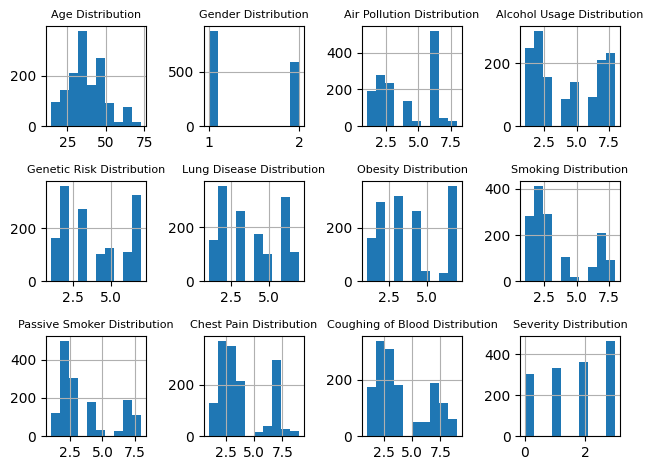

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a histogram
def draw_histograms(df, variables, n_rows, n_cols):
  fig = plt.figure()
  for i, var_name in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    df[var_name].hist(bins = 10, ax = ax)
    ax.set_title(var_name + " Distribution")
    ax.title.set_size(8)
  fig.tight_layout()
  plt.show()

draw_histograms(df, df.columns, 3, 4)

*Checking for Outliers*

In [ ]:
# Check for outliers
import plotly.express as px

# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df, x='Coughing of Blood', y='Severity', title='Box Plot of Severity Grouped by Gender', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(template="plotly_white")

# Show the plot
fig_box.show('colab')

*Checking for Variance*

*Checking for Collinearity*

                        Age    Gender  Air Pollution  Alcohol Usage  \
Age                1.000000 -0.104146       0.041456       0.132828   
Gender            -0.104146  1.000000      -0.165097      -0.155158   
Air Pollution      0.041456 -0.165097       1.000000       0.512734   
Alcohol Usage      0.132828 -0.155158       0.512734       1.000000   
Genetic Risk       0.034801 -0.157086       0.427816       0.711012   
Lung Disease       0.080342 -0.141740       0.382661       0.594977   
Obesity            0.011607 -0.093119       0.379112       0.548102   
Smoking            0.052435 -0.170858       0.323364       0.487187   
Passive Smoker    -0.003206 -0.143020       0.412868       0.510851   
Chest Pain         0.013554 -0.166448       0.394851       0.603992   
Coughing of Blood  0.039650 -0.105924       0.365993       0.561570   
Severity           0.035742 -0.074792       0.382265       0.223088   

                   Genetic Risk  Lung Disease   Obesity   Smoking  \
Age    

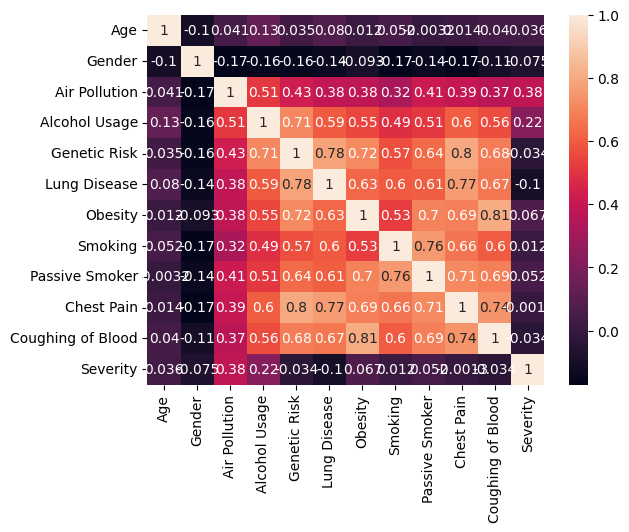

In [ ]:
# Plotting the confusion matrix
import pandas as pd

df_c = pd.DataFrame(df)
corr_Matrix = df_c.corr()
print(corr_Matrix)

sns.heatmap(corr_Matrix, annot = True)
plt.show()

**Implement K-NN with Scikit-Learn**

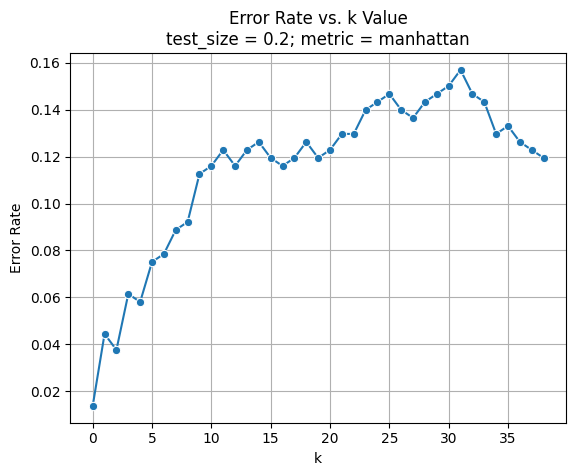

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into features and label
## Features: Age	Gender	Air Pollution	Alcohol Usage	Genetic Risk	Lung Disease
##           Obesity	Smoking	Passive Smoker	Chest Pain	Coughing of Blood
## Label:    Severity
X = df[['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking','Passive Smoker','Chest Pain',
        'Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'manhattan'

# Check error rate for k = 1 to 40
error_rate = []

for k in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = k, metric = met)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error_rate.append(1 - accuracy_score(y_test, y_pred))

# Plot line graph of error rate
sns.lineplot(error_rate, marker = 'o')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k Value\ntest_size = 0.2; metric = manhattan')

plt.show()

*K-NN with k = 1 (lowest error rate, most prone to overfitting)*

[[57  0  0  0]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 1  3  0 94]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.95      1.00      0.97        58
           2       1.00      1.00      1.00        80
           3       1.00      0.96      0.98        98

    accuracy                           0.99       293
   macro avg       0.98      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



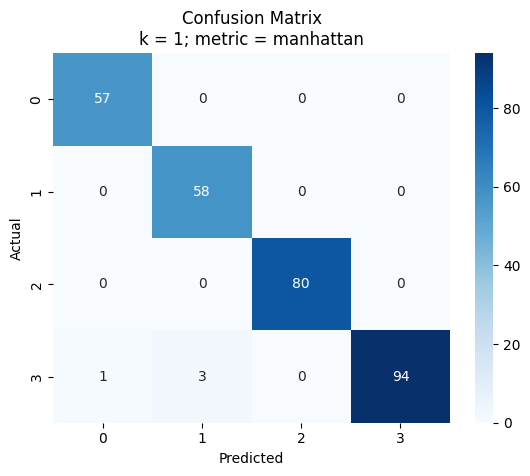

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'manhattan'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 1, metric = met)   # Set K = 1 (lowest error rate)
knn.fit(X_train, y_train)                                   # Set metric = 'manhattan'

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 1; metric = ' + met
plt.title(title)

plt.show()

Feature: 0, Score: 0.01962
Feature: 1, Score: 0.01536
Feature: 2, Score: 0.02730
Feature: 3, Score: 0.01143
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00256
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000


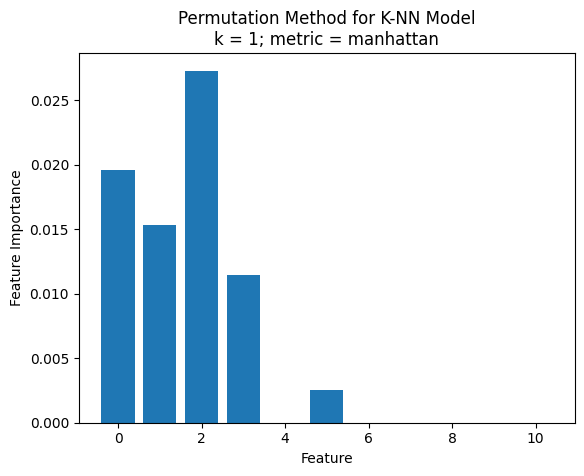

In [14]:
# Permutation for feature importance with K-NN for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Fit the model
results = permutation_importance(knn, X_train, y_train, scoring = 'accuracy')
# Get importance
importance = results.importances_mean
# Summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Permutation Method for K-NN Model\nk = 1; metric = ' + met
plt.title(title)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

*K-NN with k = 3 (2nd lowest error rate, reduces overfitting)*

[[57  0  0  0]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 2  9  0 87]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       0.87      1.00      0.93        58
           2       1.00      1.00      1.00        80
           3       1.00      0.89      0.94        98

    accuracy                           0.96       293
   macro avg       0.96      0.97      0.96       293
weighted avg       0.97      0.96      0.96       293



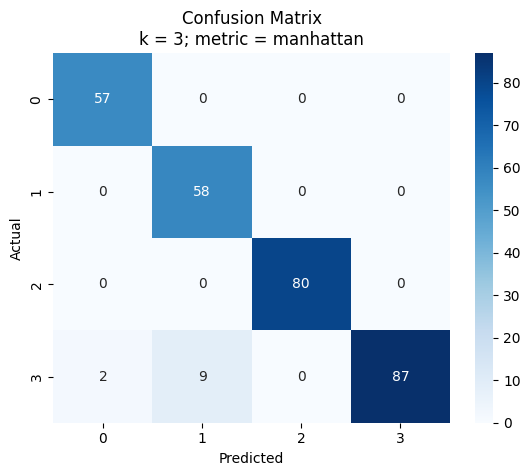

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'manhattan'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 3, metric = met)   # Set K = 3 (2nd lowest error rate, reduces overfitting)
knn.fit(X_train, y_train)                                   # Set metric = 'manhattan'

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 3; metric = ' + met
plt.title(title)

plt.show()

Feature: 0, Score: 0.00785
Feature: 1, Score: 0.01229
Feature: 2, Score: 0.01143
Feature: 3, Score: 0.00392
Feature: 4, Score: 0.00324
Feature: 5, Score: 0.00444
Feature: 6, Score: 0.00222
Feature: 7, Score: 0.00307
Feature: 8, Score: 0.01177
Feature: 9, Score: 0.00256
Feature: 10, Score: 0.01399


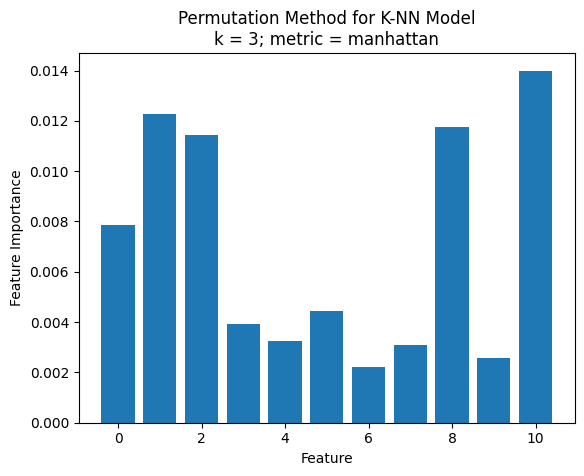

In [21]:
# Permutation for feature importance with K-NN for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Fit the model
results = permutation_importance(knn, X_train, y_train, scoring = 'accuracy')
# Get importance
importance = results.importances_mean
# Summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Permutation Method for K-NN Model\nk = 3; metric = ' + met
plt.title(title)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

[[54  0  0  3]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 4  9  0 85]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        57
           1       0.87      1.00      0.93        58
           2       1.00      1.00      1.00        80
           3       0.97      0.87      0.91        98

    accuracy                           0.95       293
   macro avg       0.94      0.95      0.95       293
weighted avg       0.95      0.95      0.95       293



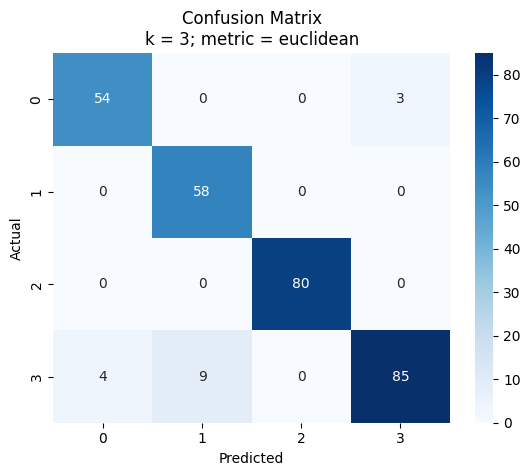

In [27]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'euclidean'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 3, metric = met)   # Set K = 3
knn.fit(X_train, y_train)                                   # Set metric = 'euclidean'

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 3; metric = ' + met
plt.title(title)

plt.show()

Feature: 0, Score: 0.05887
Feature: 1, Score: 0.07218
Feature: 2, Score: 0.14795
Feature: 3, Score: 0.11741
Feature: 4, Score: 0.06109
Feature: 5, Score: 0.07782
Feature: 6, Score: 0.05939
Feature: 7, Score: 0.04881
Feature: 8, Score: 0.05853
Feature: 9, Score: 0.07850
Feature: 10, Score: 0.08003


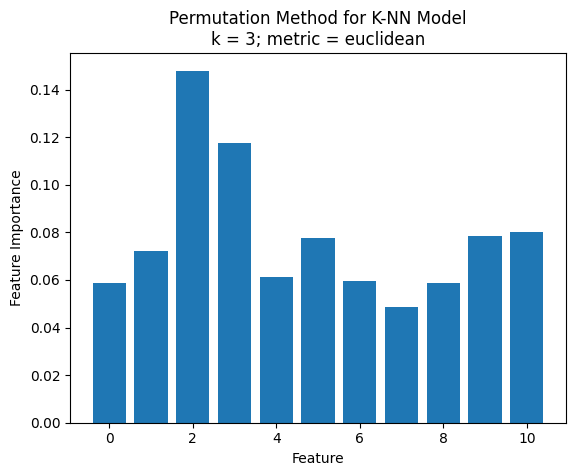

In [28]:
# Permutation for feature importance with K-NN for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Fit the model
results = permutation_importance(knn, X_train, y_train, scoring = 'accuracy')
# Get importance
importance = results.importances_mean
# Summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Permutation Method for K-NN Model\nk = 3; metric = ' + met
plt.title(title)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

Feature: 0, Score: 0.01556
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.13962
Feature: 3, Score: 0.09075
Feature: 4, Score: 0.05837
Feature: 5, Score: 0.00201
Feature: 6, Score: 0.12236
Feature: 7, Score: 0.05526
Feature: 8, Score: 0.06777
Feature: 9, Score: 0.04586
Feature: 10, Score: 0.40244


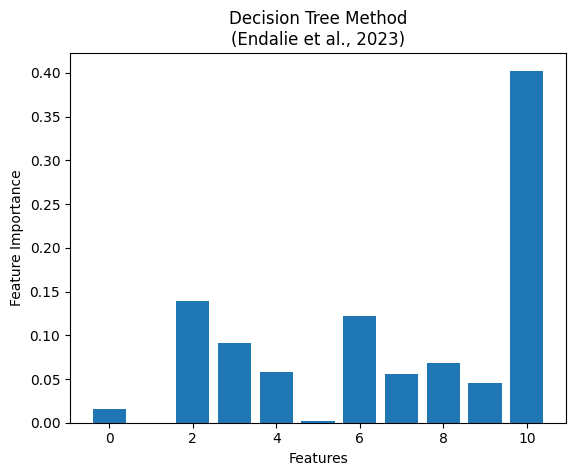

In [29]:
# Decision tree for feature importance
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier()
# Fit the model
model.fit(X_train, y_train)
# Get importance
importance = model.feature_importances_
# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Decision Tree Method\n(Endalie et al., 2023)'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()